# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [90]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score




# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn import set_config
set_config(display='diagram')

In [91]:
df = pd.read_excel('GermanCredit.xlsx')

In [92]:
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [93]:
df.shape[0]

# We have 1000 records

1000

# 3. Plot Histogram for column 'CreditAmount'

<AxesSubplot:>

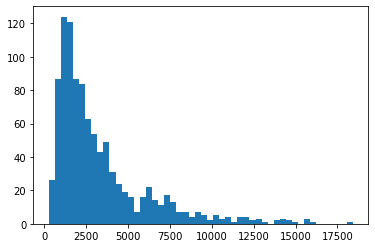

In [94]:
df['CreditAmount'].hist(bins=50,grid=False)

# 3b. Create creditability dataframe

In [95]:
df1 = pd.get_dummies(df['Creditability'],prefix='Creditability')

In [96]:
df1.head()

,Creditability_0,Creditability_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [97]:
df2= pd.concat([df,df1],axis=1) 

In [98]:
df2.head()

,Creditability,CreditAmount,DurationOfCreditInMonths,Creditability_0,Creditability_1
0,1,1049,18,0,1
1,1,2799,9,0,1
2,1,841,12,0,1
3,1,2122,12,0,1
4,1,2171,12,0,1


In [99]:
# Instances where crediblity = 1
df2[df2['Creditability_0']==0]['Creditability_0'].count()

700

In [100]:
# instances where crediblity = 0
df2[df2['Creditability_0']==1]['Creditability_0'].count()

300

In [101]:
df2['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

<AxesSubplot:xlabel='Creditability', ylabel='CreditAmount'>

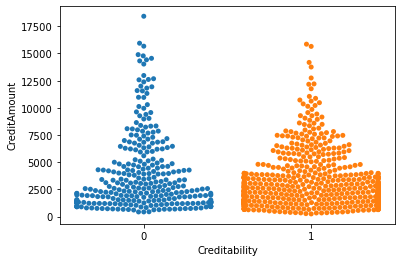

In [102]:
sns.swarmplot(y='CreditAmount',x='Creditability',data=df)

# 6. Prepare input data for the model

In [103]:
y = df.Creditability

X = df.drop('Creditability',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=10)

# 7. Fit logistic regression model

In [104]:
lr  = LogisticRegression(random_state=10)

lr.fit(X_train,y_train)

LogisticRegression(random_state=10)

# 8. Test accuracy calculation

In [105]:
y_pred = lr.predict(X_test)

accuracy_score(y_test,y_pred)

0.69

# 9. Build a confusion matrix

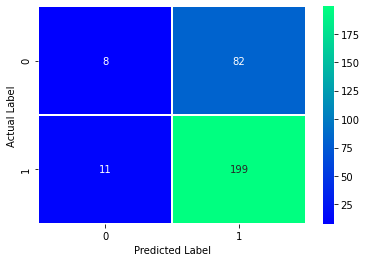

In [106]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='winter',linewidths=1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [107]:
y_pred_proba = lr.predict_proba(X_test)

In [108]:
cred_0_prob = y_pred_proba[:,0]

In [109]:
cred_1_prob = y_pred_proba[:,1]

<AxesSubplot:ylabel='Density'>

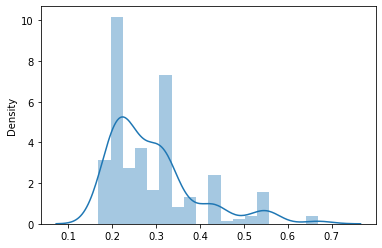

In [110]:
sns.distplot(cred_0_prob)

<AxesSubplot:ylabel='Density'>

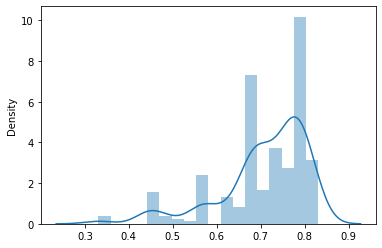

In [111]:
sns.distplot(cred_1_prob)